In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [3]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe(include='all') # include='all'은 문자열에 대해서도 통계를 내준다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

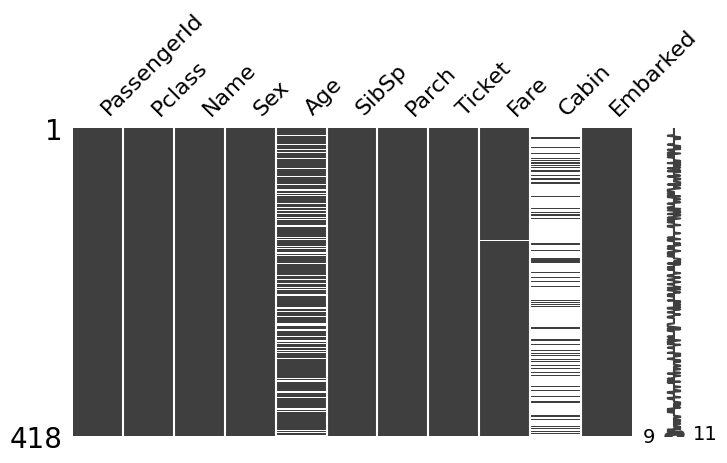

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


In [8]:
import missingno as msno
msno.matrix(test, figsize=(8,4))
plt.show()
train1 = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(train1)

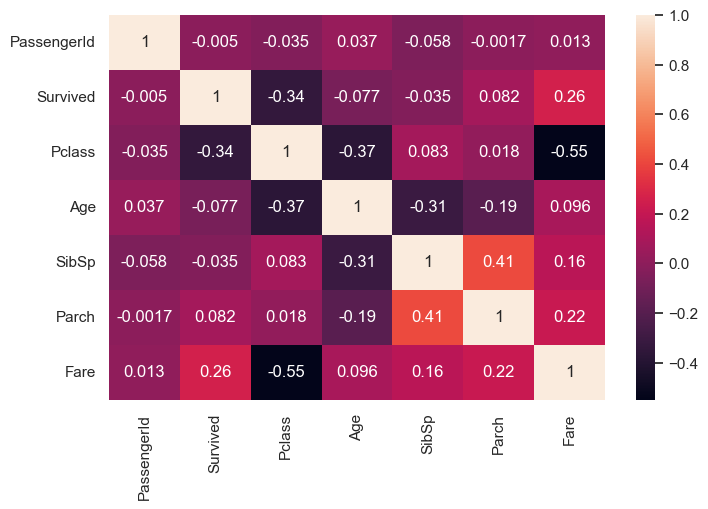

In [9]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(train1.corr(), annot=True, cbar=True)
plt.show()

In [11]:
# train1.info()
# train1.describe()
# train1 = train1.fillna(29)
# train1
# names = train1.columns
# n = len(names)
# pv = 0.05

# data = []

# for i in range(0, n):
#     fields = names[1] + 'vs' + names[i]
#     s, p = stats.pearsonr(train1[names[1]], train1[names[i]])
#     result = p < pv

#     data.append({'fields': fields, 'statistic':s, 'pvalue': p, 'result': result})

# rdf = DataFrame(data)
# rdf.set_index('fields', inplace=True)
# rdf

In [12]:
# concat 함수로 데이터프레임(train, test)을 위아래 방향(axis=0)으로 연결한다.
# train 데이터와 test 데이터를 구분하기 위해 TrainSplit으로 분류하고
# train과 test를 값으로 지정한다.
# 타이타닉 전체 데이터셋 준비
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data)

     PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [18]:
# 가장 먼저 숫자형 데이터를 가진열을 추가하고 data-num 변수에 저장한다.
# fillna() 메소드를 사용하여 'Age'열의 결측값을 평균값으로 대체한다.
# 'Fare'열의 결측값은 가장 빈도수가 많은 값으로 대체한다(최빈값)

# 숫자형 피처 추출
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# 결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

# 학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_feature = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x_train = data_num.loc[data['TrainSplit']=='Train', selected_feature]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

x_test = data_num.loc[data['TrainSplit']=='Test', selected_feature]

print("Train 데이터셋 크기 :", x_train.shape, y_train.shape)
print("Test 데이터셋 크기 :", x_test.shape)
# print(data['TrainSplit'].head())
# print(x_test.head())



Train 데이터셋 크기 : (891, 5) (891,)
Test 데이터셋 크기 : (418, 5)


In [19]:
# 학습 데이터(x_train, y_train)를 훈련데이터 80%, 검증데이터 20%로 구분한다.
# 로지스틱 회귀분류 모델에 훈련데이터를 입력하여 학습시킨다.
# 검증 데이터에 대한 예측값(y_val_pred)을 실제값(y_val)값과 비교하여
# 혼동행렬을 계산하고 그래프로 표시한다.

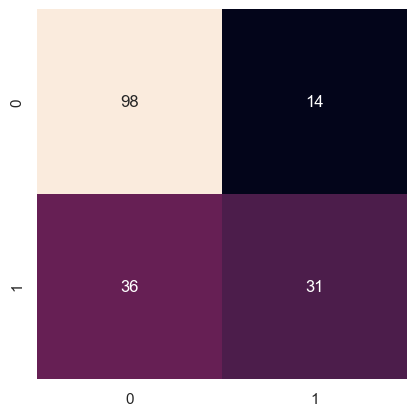

In [20]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()

모형의 예측값과 실제값을 각각 축으로 하는 2x2 매트릭스 표현을 한 것을 혼동행렬이라고 부르고
이를 근거로 정밀도, 재현율, f1(f1-score)를 산출할 수 있다.
정밀도 True로 예측한 분석 대상중에서 실제 값이 True인 비율을 말한다. 
정밀도가 높다는 것은 False Positive(실제 False를 True로 잘못 예측하는 오류가적다는 것을 의미한다.)
재현율은 실제 True 중에서 True로 에측하여 모형이 적중한 비율을 말한다.
재현율이 높다는 것은 False Negative(실제 Ture를 False)로 잘못 예측하는 오류가 낮다는 뜻이다.
F1지표는 정확도와 재현율의 조화 평균을 계산한 값으로, 모형의 예측력을 종합적으로 평가하는 지표다.
지표값이 높을 수록 분류 모형의 예측력이 좋다고 말할 수 있다.

In [21]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.7207
Precision:0.6889
recall:0.4627
F1:0.5536
roc_auc:0.6688


In [23]:
y_test_pred = lr_model.predict(x_test)
# y_test_pred
submission['Survived'] = y_test_pred.astype(int)

In [24]:
# 타킷 레이블의 분포 확인
train['Survived'].value_counts(dropna=False)

Survived
0    549
1    342
Name: count, dtype: int64

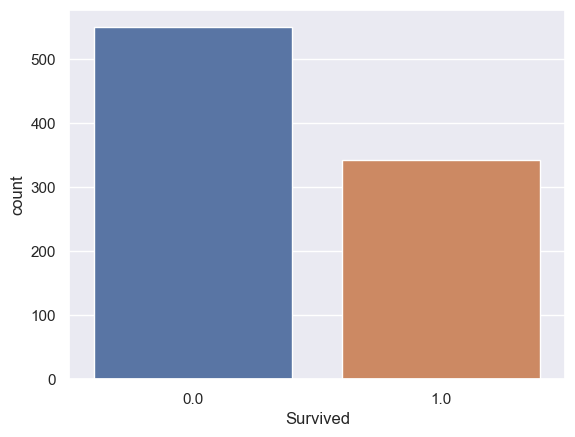

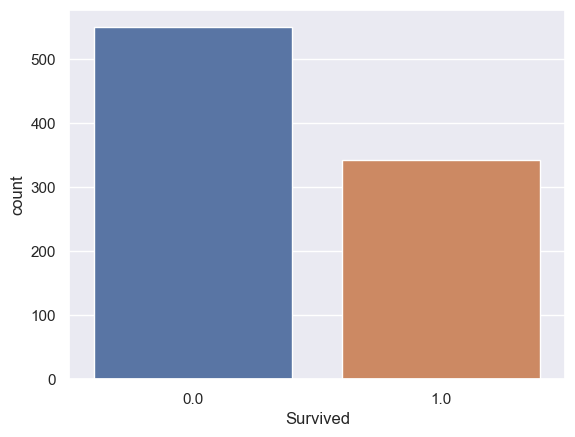

In [27]:
# 시본 countplot으로 생존자(class 1)와 사망자(class 0)의 분포를 확인한다.
# TrainSplit 열을 이용하여 train 데이터만 따로 추출하여 적용한다.

# 객실 등급별 분포 확인
sns.countplot(x='Survived', data=data)
plt.show()
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

객실 등급을 나타내는 pcalss 열의 데이터 분포를 확인한다. 3등석 승객이 가장 많고, 1등석과 2등석은 비슷한 숫자로 파악된다.
hue옵션을 이용하여 Train 데이터와 test데이터를 구분해보면 분포가 비교적 고르게 나누어진 것을 볼 수 있다.

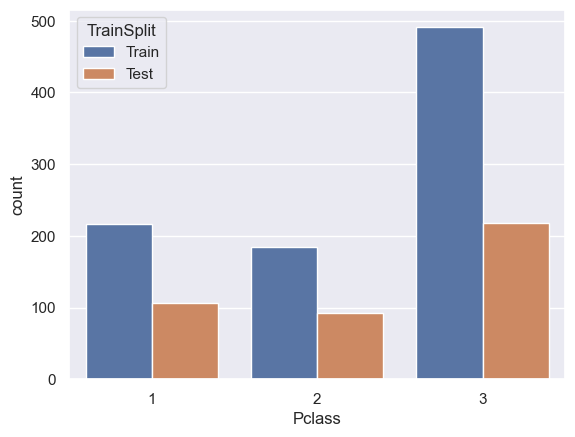

In [28]:
# train - test 데이터 분포
sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

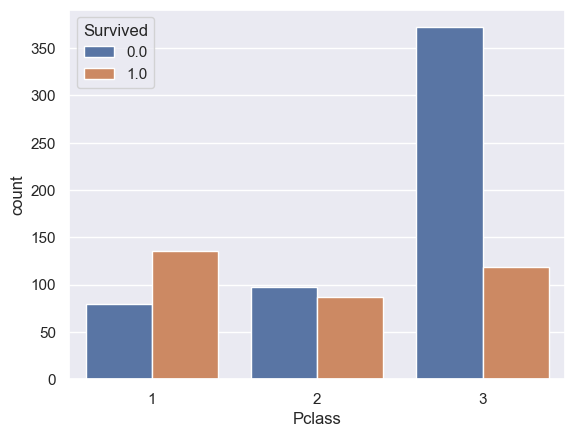

In [29]:
# Train 데이터 중에서 객실 등급에 따른 생존자 비율을 살펴본다.
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

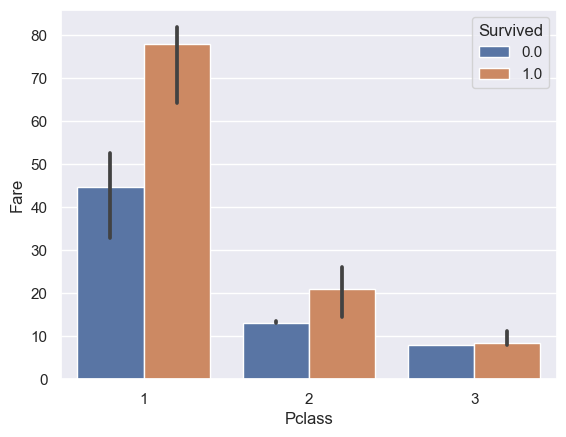

In [30]:
# 이번에는 barplot 함수를 사용해 등급별 객실 요금의 중간값 분포를살펴본다
# Pclass 별 Fare 객실 요금 중간값 비교
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=data, estimator=np.median)
# estimator 표집값들로부터 모수의 값을 추정하는 방법
plt.show()

In [31]:
# 남여 성별에 따른 생존율 분포를 파악해본다.
# 동시에 시본 histplot 함수의 multiple 옵션을 조정한다.
# multiple 속성에 dodge를 설정하면 hue옵션의 데이터를 기준으로
# 막대그래프를 서로 겹치지 않게 수평으로 펼쳐서 분리 표시한다.

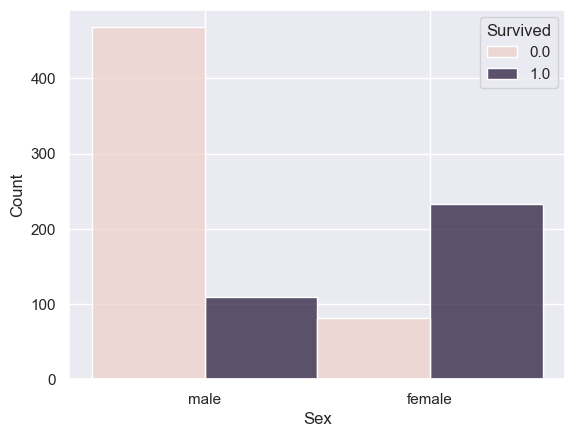

In [34]:
# histplot 함수 - dodge옵션
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data)
plt.show()

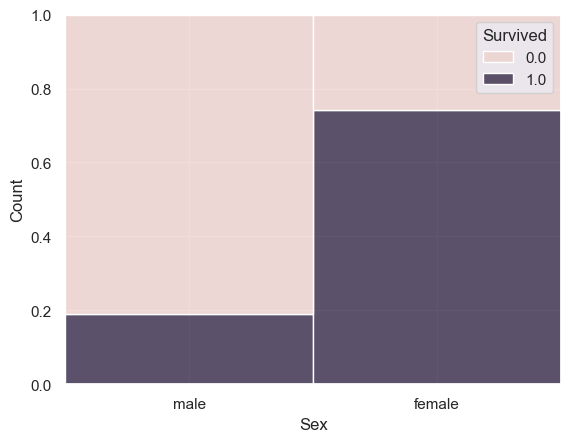

In [35]:
# multiple 속성에 fill 옵션을 설정하면 hue 속성의 상대적 비율을 알 수 있다.
# histplot 함수 - fill 옵션
sns.histplot(x='Sex', hue='Survived', data=data, multiple='fill')
plt.show()

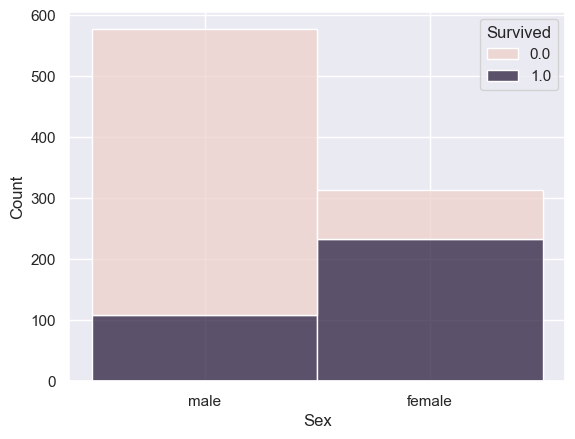

In [36]:
# histplot 함수 - stack 옵션
# 그래프를 상하 방향으로 누적하여 나타낸다.
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=data)
plt.show()

In [37]:
# 레이블 인코딩 
data.loc[data['Sex'] == 'female', 'Sex'] = 0
data.loc[data['Sex'] == 'male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

# 성별 분포 확인
data['Sex'].value_counts(dropna=False)

Sex
1    843
0    466
Name: count, dtype: int64

In [38]:
# 문자열 데이터를 다루는 방법
# 승객 이름이 들어 있는 Name 열은 문자열 데이터로만 구성이 되어 있지 않다.
# unique 값으로 고유값을 확인한다.

In [39]:
data['Name'].unique

<bound method Series.unique of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object>

name 열을 선택하고 str 속성을 적용하면 문자열을 직접 추출할 수 있다.
split 메소드를 적용하면 이름을 나타내는 문자열을 쉼표(,)를 기준으로 분할한다.
쉼표를 기준으로 2개의 문자열로 나눠지는데, 타이틀(Mr, Ms 등)이 들어있는 뒷부분의 문자열을 따로 추출한다.

In [42]:
title_name = data['Name'].str.split(",", expand=True)[1]
# 하나의 컬럼을 여러개로 나누기(expand=True)[1] 0은 ,앞에 내용
# 1은 ,뒤에 내용 추출
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [43]:
# 문자열에 split 메소드를 적용하고 마침표를 기준으로 분할하면 타이틀 부분과 성을 나타내는
# family Name 부분([1])을 나눌 수 있다. 앞부분만 선택하면 타이틀을 추출할 수 있다.
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

0
 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: count, dtype: int64

- 비슷한 속성을 가진 타이틀을 같은 그룹으로 묶는다.
- replace 함수를 타이틀이 들어 있는 시리즈 객체에 적용하면
- 리스트안의 문자열을 뒤에 나오는 문자열로 모두 바꾼다.
- 따라서 다음과 같이 7개의 그룹으로 정리 할 수 있고, 타이틀 속성을 나타내는 Title 열을 추가해 준다.

In [44]:
title = title.replace(['Ms'], 'Miss', regex=True)
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer', 'Noblea'], 'Noble', regex=True)
title = title.replace(['Col', 'Major', 'Capt'], 'Officer', regex=True)
title = title.replace(['Dr', 'Rev'], 'Priest', regex=True)
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Title
 Mr         757
 Miss       262
 Mrs        197
 Master      61
 Priest      16
 Noble        8
 Officer      7
 Noblea       1
Name: count, dtype: int64

In [45]:
# 앞에서 정리한 Title 열의 분포를 그린다. 각타이틀 별 생존여부에 따른 승객 나이의 분포를 시본 violinplot함수에 그린다.
# Noble 타이틀을 가진 승객 중에서는 생존자가 없고, 
# Officer 타이틀을 가진 승객중에서 특정 나이대에 속하는 승객만 생존자가 있다는것을 알 수 있다.

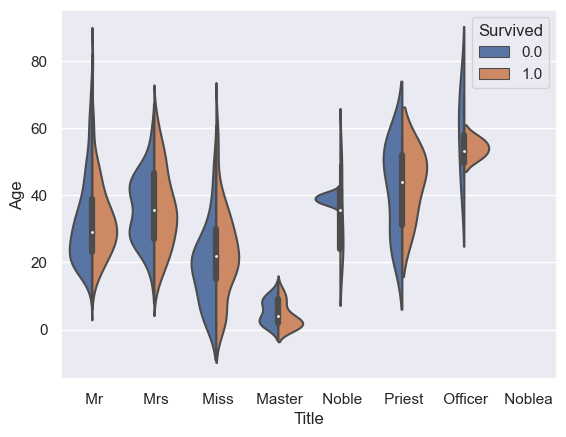

In [46]:
sns.violinplot(x='Title', y='Age', hue='Survived', data=data, split=True)
plt.show()

In [47]:
# Title 열에 의미 있는 정보를 추출하여 저장했기 때문에 불필요해진 Name 열을 데이터 프레임에서 삭제한다. 
# drop 메소드를 사용하고 축 방향을 axis=1로 지정한다.

In [48]:
# Name 열 삭제
data = data.drop('Name', axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [49]:
# 승객 나이가 들어 있는 Age 열의 결측값을 확인한다.
# 같은 타이틀을 갖는 승객끼리 그룹을 나누고,
# 그룹별 승객 나이의 중간값으로 결측값을 대체한다.

In [51]:
# 결측값 확인 및 대체
for title in data['Title'].unique():
    # 결측값 개수 확인
    print("%s 결측값 개수:" % title, data.loc[data['Title']==title, 'Age'].isnull().sum())
    # 각 Title의 중간값으로 대체
    age_med = data.loc[data['Title'] == title, 'Age'].median()
    data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)
    # 결측값 처리 여부 확인
print('\n')
print("Age 열의 평균값 개수 : ", data['Age'].isnull().sum()) 

 Mr 결측값 개수: 176
 Mrs 결측값 개수: 27
 Miss 결측값 개수: 51
 Master 결측값 개수: 8
 Noble 결측값 개수: 0
 Priest 결측값 개수: 1
 Officer 결측값 개수: 0
 Noblea 결측값 개수: 0


Age 열의 평균값 개수 :  0


In [52]:
# seaborn의 Kind 옵션을 hist로 지정하여 히스토 그램을 그린다.
# hue 속성에 따라 생존자를 구분하여 출력한다.
# 5세 미만의 승객의 생존율이 높고 30세 전후의 승객의 생존율이 낮은 경향을 보인다.

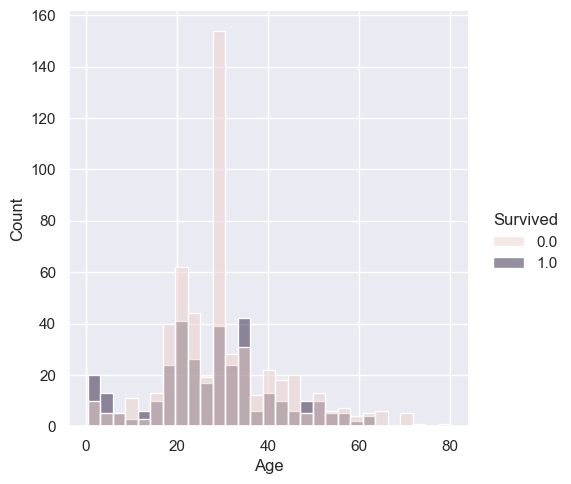

In [53]:
# Age의 분포
sns.displot(x='Age', kind='hist', hue='Survived',
            data=data)
plt.show()

- 나이에 따른 생존율 차이가 나기 때문에 앞의 히스토 그램 분포를 기준으로 Age 데이터를 여러 개 구간으로 나눈다.(비닝기법)
- 판다스의 cut함수를 사용하고 각 구간을 나누는 값을 경계값(bins), 각 구간의 이름(lables)을 지정한다.
- ex) 0~4세는 infant, 4~8세는 child 등으로 구분하여 정리한다.
- AgeBin 열을 만들어 추가한다.

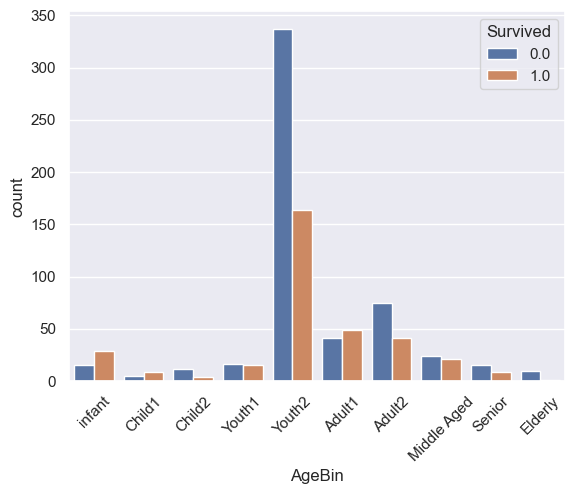

In [54]:
# Binning - 구간 나누기
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2', 'Middle Aged', 'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Age_bin(나이 구간)에 따른 생존율 비교
sns.countplot(x='AgeBin', hue='Survived', data=data)
plt.xticks(rotation=45)
plt.show()

- 동승한 형제자매/배우자 수를 나타낸다. 상자 그림을 그리는 boxplot 함수로 생존여부를 표시하면 
- 동승자가 2~3명일 경우 나이에 따른 생존 여부 차이가 있음을 알 수 있다.

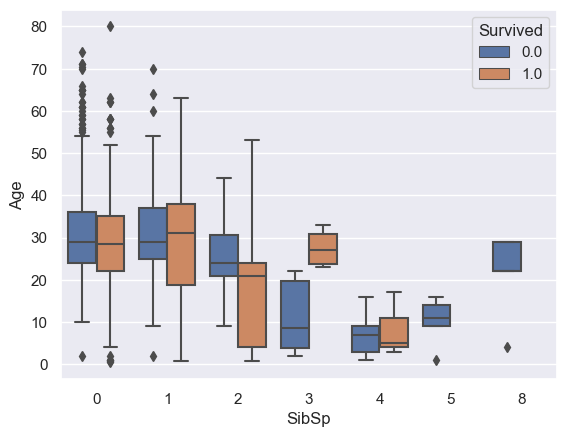

In [55]:
# 형제 자매/ 배우자 수와 승객 나이 및 생존율 관계
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=data)
plt.show()

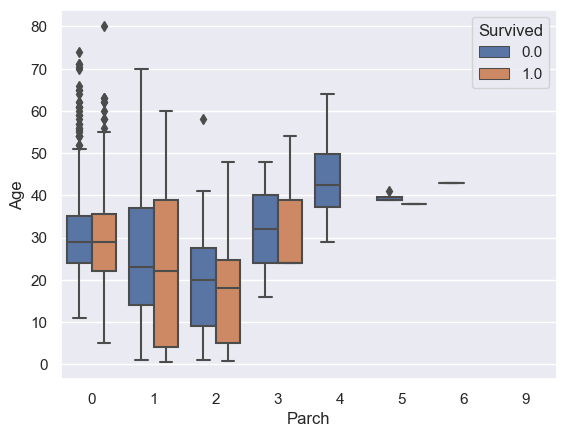

In [56]:
# 부모/자식 수에 따른 승객 나이 및 생존율 관계
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data)
plt.show()

- SibSp 열과 Parch 열의 데이터를 더하면 함께 탑승한 모든 가족의 수를 계산할 수 있다.
- 이를 토대로 가족 수와 객실 등급을 기준으로 생존율의 차이를 확인한다. 
- 가족 수에 따라 객실 등급에 따른 생존율에 차이가 있음을 알 수 있다.